Dataset Regresión Logística – Heart Disease Cleveland UCI:

1.	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
Datos = pd.read_csv('C:/Heart Disease Cleveland UCI/archive/heart_cleveland_upload.csv')

In [73]:
Datos.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [75]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

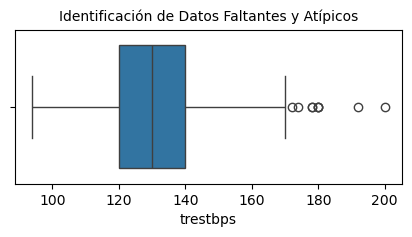

In [11]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

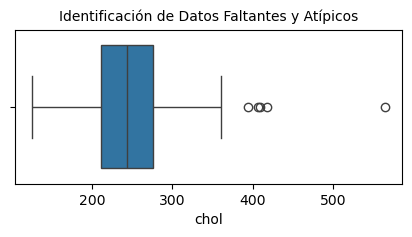

In [13]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

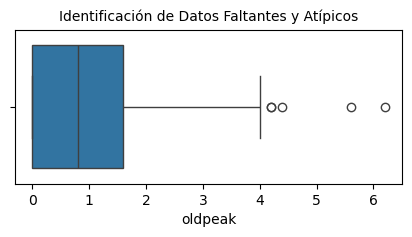

In [15]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2.	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [17]:
print("Cantidad de Registros con cero en la Presion Arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en el Colesterol Cerico: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en la Frecuencia Cardiaca Maxima alcanzada: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en la Presion Arterial en reposo:  0
Cantidad de Registros con cero en el Colesterol Cerico:  0
Cantidad de Registros con cero en la Frecuencia Cardiaca Maxima alcanzada:  0


No hay necesidad de reemplazar los datos ya que no existen valores en 0

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

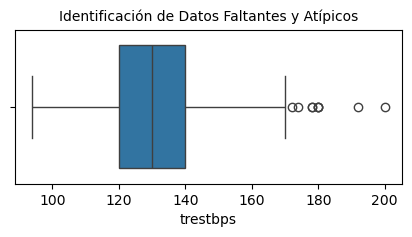

In [19]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [21]:
niv_min=100
niv_max=180
Total_Atipicos=((Datos['trestbps']<niv_min)|(Datos['trestbps']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


In [23]:
Datos=Datos[(Datos['trestbps']<niv_max)&(Datos['trestbps']>niv_min)]

In [25]:
niv_min=100
niv_max=180
Total_Atipicos=((Datos['trestbps']<niv_min)|(Datos['trestbps']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

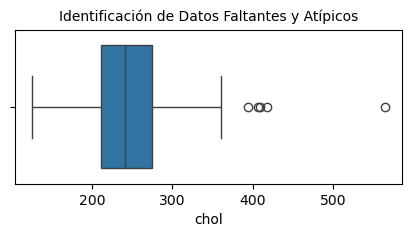

In [27]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [29]:
niv_min=200
niv_max=400
Total_Atipicos=((Datos['chol']<niv_min)|(Datos['chol']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 51


In [31]:
Datos=Datos[(Datos['chol']<niv_max)&(Datos['chol']>niv_min)]

In [33]:
niv_min=200
niv_max=400
Total_Atipicos=((Datos['chol']<niv_min)|(Datos['chol']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

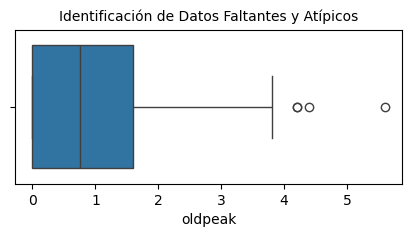

In [35]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [37]:
niv_min=0
niv_max=1
Total_Atipicos=((Datos['oldpeak']<niv_min)|(Datos['oldpeak']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 94


In [39]:
Datos=Datos[(Datos['oldpeak']<niv_max)&(Datos['oldpeak']>niv_min)]

In [41]:
niv_min=0
niv_max=1
Total_Atipicos=((Datos['oldpeak']<niv_min)|(Datos['oldpeak']>niv_max)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de Interes:

Condicion: Si la persona esta o no enferma 0 = sin enfermedad, 1 = enfermedad

Predecir si la persona posee una enfermedad cardíaca.

In [77]:
Datos["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [79]:
X = Datos.drop('condition',axis = 1)
Y = Datos['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [81]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [83]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

5.	Entrenar el modelo configurando los diferentes hiperparámetros.

In [85]:
mod_regresion = LogisticRegression(solver = 'liblinear')
mod_regresion.fit (X_train, Y_train)
Prediccion = mod_regresion.predict(X_test)

In [87]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [89]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como; 
precisión, Recall, F1-score, etc.

In [91]:
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

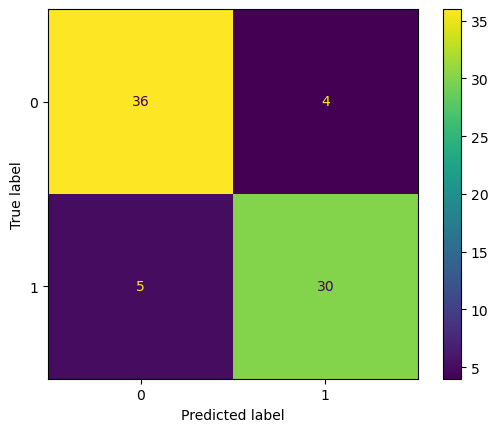

In [93]:
cm = confusion_matrix(Y_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

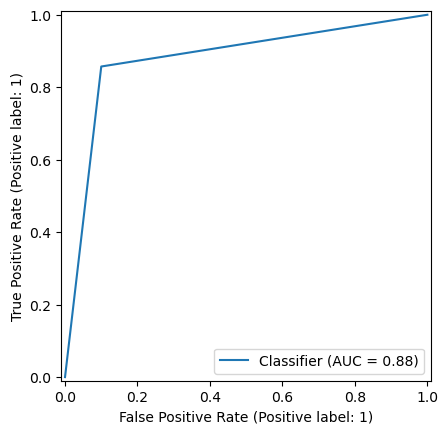

In [95]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show

Dataset Regresión Logística – Heart Disease Cleveland UCI:

8. Interpretar, analizar y documentar los resultados obtenidos.

Después de realizar las diferentes actividades se puede concluir:

•	El número total de registros dentro del Dataset es de 297 personas, dentro de las cuales la edad máxima es de 77 años y la edad mínima es de 29 años.

•	No se encontraron datos faltantes, pero si existían datos atípicos dentro de la Presión arterial en reposo, el colesterol sérico, la frecuencia cardiaca máxima alcanzada y la depresión del segmento ST inducida por el ejercicio en relación con el reposo. 

•	Después de evaluar el desempeño del modelo en el conjunto de Test, la precisión del modelo indica que el 0.88 o el 88% para la clase “Condition” que se habían predicho como enfermos realmente lo están. 

•	En base al Recall obtenido para la clase “Condition” es de 0.86 o el 86% lo que indica que el modelo identifico con exactitud el 86% de todos los enfermos.

•	Mediante el F1 Score se establece un equilibrio entre la precisión y el Recall indicando que el valor para la clase “Condition” es de 0.87 o el 87%.

•	Después de analizar los resultados obtenidos en la Matriz de confusión se puede establecer:

-	La cantidad de observaciones que el clasificador predijo de forma correcta como falsas es de 36

-	La cantidad de observaciones que el clasificador predijo de forma correcta como verdaderas es de 30

-	La cantidad de observaciones que el clasificador predijo de forma incorrecta como verdaderas es de 4

-	La cantidad de observaciones que el clasificador predijo de forma incorrecta como falsas es de 5

•	Al observar la curva de precisión del modelo se puede concluir que el AUC es de 0.88 o el 88% 

indicando que el 88% de las predicciones realizadas por el clasificador son correctas dentro de todos los umbrales de clasificación. 
